# Stratified Sampling - Example 3

- Author: Michael D. Shields
- Date: June 04, 2018

In this example, the stratified sampling method is employed to generate samples from an exponential distribution using Voronoi stratification. The method illustrates various aspects of the UQpy.SampleMethods.STS class.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the STS class from UQpy.SampleMethods.

In [1]:
from UQpy.SampleMethods import STS
from UQpy.Distributions import Exponential
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import expon
from scipy.spatial import Voronoi, voronoi_plot_2d

Run STS for 25 samples.

- 2 dimensions
- Five strata in each dimension
- Exponential distribution with location parameter = 1 and scale parameter = 1.

Create a distribution object.

In [2]:
marginals = [Exponential(loc=1., scale=1.), Exponential(loc=1., scale=1.)]

Run stratified sampling

In [3]:
x_sts = STS(dist_object=marginals, nsamples=25, stype='Voronoi')

Plot the resulting stratified samples and the boundaries of the strata in the U(0,1) space.

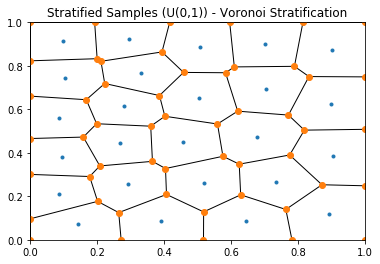

In [4]:
fig = voronoi_plot_2d(x_sts.strata)
plt.title('Stratified Samples (U(0,1)) - Voronoi Stratification')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [5]:
print(x_sts.strata.weights)

[0.0489905213546024, 0.0328856563356362, 0.032375810206941684, 0.03390744072228896, 0.04022914946712036, 0.03752264487151789, 0.03253370300771697, 0.03686051056298797, 0.033153028796995165, 0.030658655279899076, 0.048732340491738094, 0.04350173925869145, 0.04796071864873605, 0.03296521042918892, 0.04320610271979825, 0.043513219437708694, 0.0420436699057858, 0.04085232113211257, 0.04201535137992095, 0.05205712499326827, 0.033826622514302615, 0.04232345979174667, 0.04738817375389025, 0.040520615892510534, 0.039976209044894316]


Plot the resulting stratified exponential samples in the sample space.

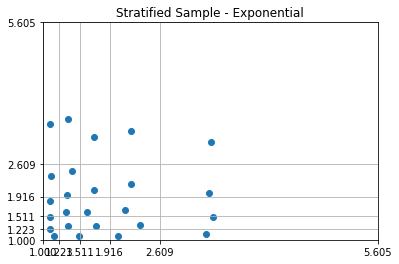

In [6]:
fig, ax = plt.subplots()
plt.title('Stratified Sample - Exponential')
plt.scatter(x_sts.samples[:, 0], x_sts.samples[:, 1])
ax.set_yticks([1.0, expon.ppf(0.2,1,1), expon.ppf(0.4,1,1), expon.ppf(0.6,1,1), expon.ppf(0.8,1,1), expon.ppf(0.99,1,1)])
ax.set_xticks([1.0, expon.ppf(0.2,1,1), expon.ppf(0.4,1,1), expon.ppf(0.6,1,1), expon.ppf(0.8,1,1), expon.ppf(0.99,1,1)])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(1, expon.ppf(0.99,1,1))
plt.xlim(1, expon.ppf(0.99,1,1))
plt.show()

In [7]:
print(x_sts.samples)

[[3.31212369 3.07840687]
 [1.35038546 3.55692455]
 [1.10027555 1.47665661]
 [1.32856971 1.95124529]
 [1.61144045 1.59670457]
 [1.15366341 1.0741896 ]
 [1.31212923 1.58574731]
 [1.11178909 2.35687805]
 [1.09189795 1.82098706]
 [1.09023722 1.238847  ]
 [3.29027789 1.9819494 ]
 [1.70553968 3.17898094]
 [3.34068515 1.4887873 ]
 [1.40368443 2.45914909]
 [2.03308144 1.08905089]
 [2.21649072 2.1807228 ]
 [1.73220735 1.30275414]
 [2.3294462  1.31190018]
 [1.49826799 1.08991891]
 [3.24192094 1.12525578]
 [1.10253168 3.44937588]
 [1.69977111 2.05461805]
 [2.1321452  1.64160086]
 [2.20627856 3.30296792]
 [1.34715723 1.29513254]]
